# Part A: Data Exploration and Baseline Model [10 points]
1. Load and Analyze the Dataset: Load the creditcard.csv dataset. This dataset has already been pre-processed using PCA, so no feature engineering is required. [1]
2. Analyze Class Distribution: Print the class distribution (count of fraudulent vs. non-fraudulent transactions). A pie chart or bar plot would be a good visualization. Clearly state the degree of imbalance. [2]
3. Baseline Model:
    - Split the original dataset into training and testing sets. Crucially, ensure the test
set retains its original imbalance. [2]
    - Train a Logistic Regression classifier on the imbalanced training data. This will be your Model 1. [2]
    - Evaluate the model's performance on the test set. Pay close attention to metrics robust to imbalance, such as Precision Recall, and the F1-score for the minority (fraudulent) class. Explain why accuracy is a misleading metric in this scenario. [3]

how do you compose the clustering algorithm such that classification works better

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load and Analyze Dataset

Load the creditcard.csv dataset. This dataset has already been pre-processed using PCA, so no feature engineering is required. 

In [5]:
dataset = pd.read_csv("datasets/creditcard.csv")

In [6]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


Looks like the dataset is centered. It is also known from the dataset description that PCA has been applied to the dataset. This means the first feature `V1` is the first principal component with maximum explained variance

In [8]:
dataset["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

This clearly shows data imbalance.

##  Analyze Class Distribution

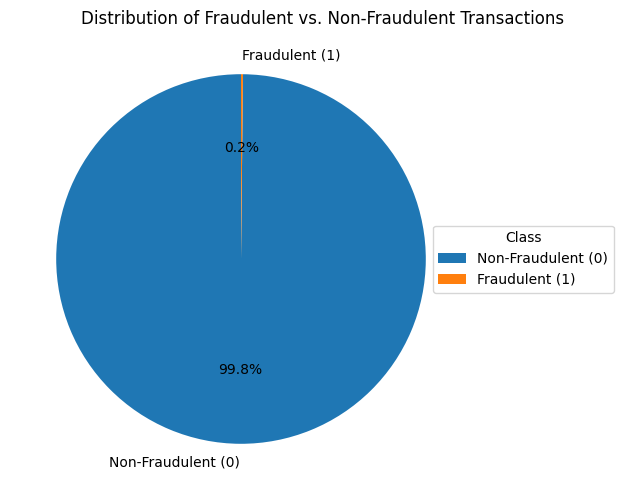

In [9]:
class_counts = dataset['Class'].value_counts()
labels = ['Non-Fraudulent (0)', 'Fraudulent (1)']

plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Fraudulent vs. Non-Fraudulent Transactions', loc="right", pad=1, x=1.2)
plt.legend(loc='center left', bbox_to_anchor=(0.9, 0.5), title='Class')

In [10]:
print("Class Distribution:")
print(class_counts)
print("*"*50)
imbalance_ratio = class_counts[0] / class_counts[1] if 1 in class_counts else 'Infinite (no fraud cases)'
print(f"Degree of Imbalance: {imbalance_ratio:.2f}:1 (Non-Fraud:Fraud)")

Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64
**************************************************
Degree of Imbalance: 577.88:1 (Non-Fraud:Fraud)


The degree of imbalance `577.88:1 (Non-Fraud:Fraud)` is very high

In [11]:
import plotly.graph_objects as go
import pandas as pd

# Assuming 'dataset' is your pandas DataFrame with the 'Class' column (0 for non-fraud, 1 for fraud)
class_counts = dataset['Class'].value_counts()
total_transactions = len(dataset)

labels = ["All Transactions", "Non-Fraud", "Fraud"]
source = [0, 0]  # All transactions split into non-fraud and fraud
target = [1, 2]  # Non-fraud and fraud nodes
value = [class_counts[0], class_counts[1]]  # Actual counts for non-fraud and fraud

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=5,
        line=dict(color="black", width=0.5),
        label=labels,
        color="blue"
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    )
)])

fig.update_layout(
    title_text="Transactions to Fraudulent vs. Non-Fraudulent Transactions",
    font_size=11,
    width=500,
    height=400
)
fig.show()

These analyses show clearly how imbalanced the dataset is.

##  Baseline Model

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [13]:

X = dataset.drop("Class", axis=1)
y = dataset.pop("Class")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, shuffle=True,
                                                    stratify=y)

In [14]:
baseline_model_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", LogisticRegression(max_iter=1000))
])

In [15]:
baseline_model_pipeline.fit(X_train, y_train)

y_pred = baseline_model_pipeline.predict(X_test)

Text(0.5, 1.02, 'Confusion Matrix of Baseline Model')

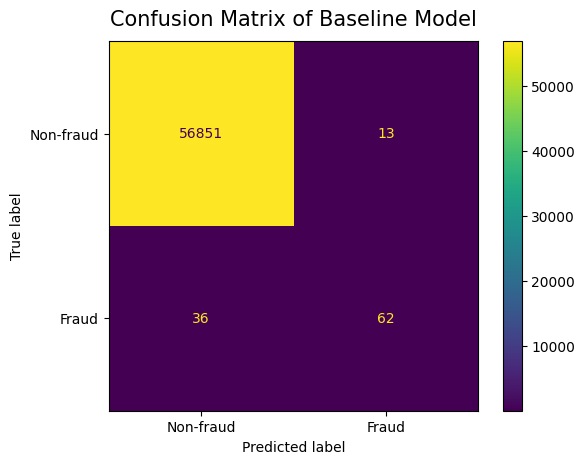

In [16]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["Non-fraud", "Fraud"])
plt.title("Confusion Matrix of Baseline Model",  fontsize=15, y=1.02)

In [17]:
precision_base_model = precision_score(y_test, y_pred)
recall_base_model = recall_score(y_test, y_pred)
accuracy_base_model = accuracy_score(y_test, y_pred)
f1_base_model = f1_score(y_test, y_pred)

print("The metrics of the baseline model for predicting Fraudulent transactions are: ", end='\n\n')
print("Accuracy : ", accuracy_base_model)
print("Precision : ", precision_base_model)
print("Recall : ", recall_base_model)
print("F1 Score : ", f1_base_model)

The metrics of the baseline model for predicting Fraudulent transactions are: 

Accuracy :  0.9991397773954567
Precision :  0.8266666666666667
Recall :  0.6326530612244898
F1 Score :  0.7167630057803468


This shows very clearly that the model is very effective in terms of accuracy and has fairly decent precision. But looking at recall, the model is not effective at all. Here are a few specific observations that signify this.

1. Accuracy close to 1 signifies that accuracy is highly influenced by the number of datapoints
    - This wrongly indicates that the model is doing great
2. Precision of ~0.83 shows that out of all the datapoints predicted to be fraud, only ~83% of them were actually fraud. 
    - Which again is not bad but it is not representative of the truth
3. Recall of ~0.63 shows that out of all the fraudulent transactions, only ~63% of them were correctly predicted as fraud by the model.
    - This is the most relevant metric of all as it clearly shows the real performance of the model.
    - It is important because we care far more about finding fraudulent transactions than we do about non-fraudulent ones
4. F1 score is a function of precision and recall.
    - It also isn't very indicative of the model performance but definitely does a better job than accuracy.

This is also clear from the confusion matrix. 

# Part B: Resampling Approaches [25 points]
1. Naive Oversampling (SMOTE): [5]
    - Apply the SMOTE (Synthetic Minority Over-sampling Technique) algorithm to the training data. This method generates synthetic samples for the minority class. [3]
    - Explain how SMOTE works and its potential limitations, such as generating noisy samples if the minority class is not well-defined. [2]
    - Citation: N. V. Chawla, K. W. Bowyer, L. O. Hall, and W. P. Kegelmeyer, "SMOTE: Synthetic Minority Over-sampling Technique," Journal of Artificial Intelligence Research, vol. 16, pp. 321–357, 2002.
2. Clustering-Based Oversampling (CBO): [10]
    - Explain the concept of using clustering for oversampling to ensure diversity and explain how it achieves this goal. [2]
    - Use a clustering algorithm, such as K-Means, to identify a few clusters within the training data of the minority class only. You can choose k based on intuition or the Elbow Method. [5]
    - Oversample from each minority cluster to create a new, balanced dataset. The goal is to ensure that all sub-groups are well-represented, thereby avoiding the creation of synthetic samples in regions with no actual data. [3]
3. Clustering-Based Undersampling (CBU): [5]
    - Explain the concept of using clustering for undersampling. The idea is to find sub-groups within the majority class and strategically remove instances to maintain a representative sample while reducing its size. [2]
    - Use a clustering algorithm to find clusters within the training data of the majority class only. [5]
    - Undersample from each cluster. For instance, you could remove samples from clusters that are closer to the minority class, or you could simply undersample each cluster proportionally to its size to preserve the original distribution of the majority class. [3]
    - The final training set will comprise all instances of the minority class and the selected subset of majority class instances.

Note: Libraries like imblearn provide convenient implementations for both SMOTE and clustering-based resampling methods, such as ClusterCentroids for undersampling.

## Naive Oversampling (SMOTE)

SMOTE (Synthetic Minority Over-sampling Technique) addresses class imbalance in datasets by generating synthetic minority class samples. This should help improve classifier performance on rare events like fraud detection. Developed by Chawla et al. (2002), it creates new samples by interpolating between existing minority instances and their k-nearest neighbors. For a minority sample $ x_i $, SMOTE selects a neighbor $ x_{nn} $, then generates a synthetic point $ x_{syn} = x_i + \lambda \cdot (x_{nn} - x_i) $, where $ \lambda \in [0,1] $ is random. This expands the minority class region, avoiding overfitting from simple duplication.

However, SMOTE has limitations. 
1. Generation of Noisy or Unrealistic Samples: When the minority class is poorly defined due to noise, outliers, or ambiguous boundaries, SMOTE may produce synthetic samples that are unrealistic, misleading the classifier and increasing false positives.
2. Assumption of Local Linearity: SMOTE relies on linear interpolation between minority samples, which fails in datasets with non-linear manifolds or complex geometries, potentially creating samples outside the true data distribution.
3. Challenges in High-Dimensional Data: In high-dimensional spaces, sparse data distributions make nearest neighbors less reliable, leading to synthetic samples that poorly represent the minority class.
4. Ignoring Majority Class Distribution: SMOTE focuses solely on the minority class, disregarding the majority class structure, which can result in synthetic samples overlapping with majority regions, blurring decision boundaries.
5. Risk of Overfitting: By generating synthetic samples near existing ones, SMOTE can cause the classifier to overfit, especially in small datasets, as models may memorize overly specific minority class patterns.
6. Computational Cost: Calculating k-nearest neighbors for large datasets is computationally expensive, particularly with naive implementations, though optimized data structures like KD-trees can mitigate this.

To counter these, combining SMOTE with cleaning methods (e.g., Edited Nearest Neighbors) or ensemble techniques helps. Careful validation using AUC-ROC or precision-recall metrics is essential to ensure SMOTE enhances performance. While powerful, SMOTE demands domain expertise to navigate its pitfalls, particularly when minority class structure is unclear.

In [ ]:
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [19]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

/opt/anaconda3/envs/da5401/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.



In [ ]:
print("Original training set class distribution:\n", y_train.value_counts())
print("SMOTE resampled training set class distribution:\n", pd.Series(y_train_smote).value_counts())

Original training set class distribution:
 Class
0    227451
1       394
Name: count, dtype: int64
SMOTE resampled training set class distribution:
 Class
0    227451
1    227451
Name: count, dtype: int64


In [22]:
smote_model_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", LogisticRegression(max_iter=1000))
])


In [23]:
smote_model_pipeline.fit(X_train_smote, y_train_smote)

y_pred_smote = smote_model_pipeline.predict(X_test)

Text(0.5, 1.02, 'Confusion Matrix of SMOTE Model')

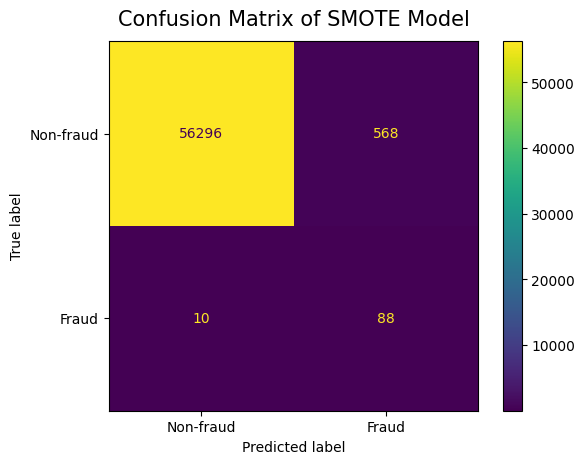

In [24]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_smote, display_labels=["Non-fraud", "Fraud"])
plt.title("Confusion Matrix of SMOTE Model",  fontsize=15, y=1.02)

In [25]:
precision_smote_model = precision_score(y_test, y_pred_smote)
recall_smote_model = recall_score(y_test, y_pred_smote)
accuracy_smote_model = accuracy_score(y_test, y_pred_smote)
f1_smote_model = f1_score(y_test, y_pred_smote)

print("The metrics of the SMOTE model for predicting Fraudulent transactions are: ", end='\n\n')
print("Accuracy : ", accuracy_smote_model)
print("Precision : ", precision_smote_model)
print("Recall : ", recall_smote_model)
print("F1 Score : ", f1_smote_model)

The metrics of the SMOTE model for predicting Fraudulent transactions are: 

Accuracy :  0.9898528843790597
Precision :  0.13414634146341464
Recall :  0.8979591836734694
F1 Score :  0.23342175066312998


This shows that the SMOTE model has significantly altered the performance metrics compared to the baseline, reflecting the impact of oversampling the minority class. Here are a few specific observations that signify this:

1. **Accuracy** dropping by around 1% indicates a trade-off due to the synthetic oversampling of the minority class.
    - This suggests the model is less focused on overall correctness and more on balancing the classes, which is expected but reduces the misleadingly high accuracy seen in the baseline.
2. **Precision** shows that out of all the datapoints predicted to be fraud, only ~13% were actually fraud.
    - This is quite low, indicating a **high number of false positives**, which might be a downside of aggressive oversampling.
3. **Recall** shows that out of all the fraudulent transactions, ~90% were correctly predicted as fraud by the model.
    - This is a substantial improvement over the baseline and is the most relevant metric here, as it highlights the model's **enhanced ability to detect fraudulent transactions**, which is critical for a fraud detection system.
    - It is important because the primary goal is to identify as many fraudulent cases as possible, even at the cost of precision.
4. **F1 score**, again, being a harmonic mean of precision and recall, reflects the imbalance between the two metrics.
    - It indicates a moderate overall performance but underscores the challenge of balancing precision and recall in this scenario, performing better than accuracy as a holistic measure.

This is also clear from the confusion matrix, which shows an increase in true positives and false positives due to the oversampling.

## Clustering-Based Oversampling

2. Clustering-Based Oversampling (CBO): [10]
    - Explain the concept of using clustering for oversampling to ensure diversity and explain how it achieves this goal. [2]
    - Use a clustering algorithm, such as K-Means, to identify a few clusters within the training data of the minority class only. You can choose k based on intuition or the Elbow Method. [5]
    - Oversample from each minority cluster to create a new, balanced dataset. The goal is to ensure that all sub-groups are well-represented, thereby avoiding the creation of synthetic samples in regions with no actual data. [3]

Clustering-based oversampling (CBO) leverages unsupervised learning to enhance the diversity of the minority class in imbalanced datasets, ensuring a more representative training set for classification tasks like fraud detection.
- **Diversity of data**: By applying a clustering algorithm (e.g., K-Means) to the minority class, CBO identifies distinct subgroups or clusters within the data, capturing underlying patterns or variations that might be overlooked by uniform oversampling methods.
- **Goal oriented**: Each cluster is oversampled individually, generating synthetic samples within the boundaries of existing clusters rather than randomly across the feature space. This approach ensures that synthetic data points are created in regions with actual minority class instances, preserving the natural distribution and diversity of the minority class.
- **Reduces Overgeneralization**: Unlike naive methods like SMOTE, which may produce noisy samples in sparse or undefined regions, CBO limits synthetic sample generation to cluster-specific areas, reducing the risk of overfitting and improving model generalization.
- **Balanced Representation**: By ensuring all subgroups are adequately represented through targeted oversampling, CBO creates a balanced dataset that better reflects the minority class’s complexity, enhancing the classifier’s ability to detect rare events like fraudulent transactions.

In [55]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline as ImbPipeline

### K means based

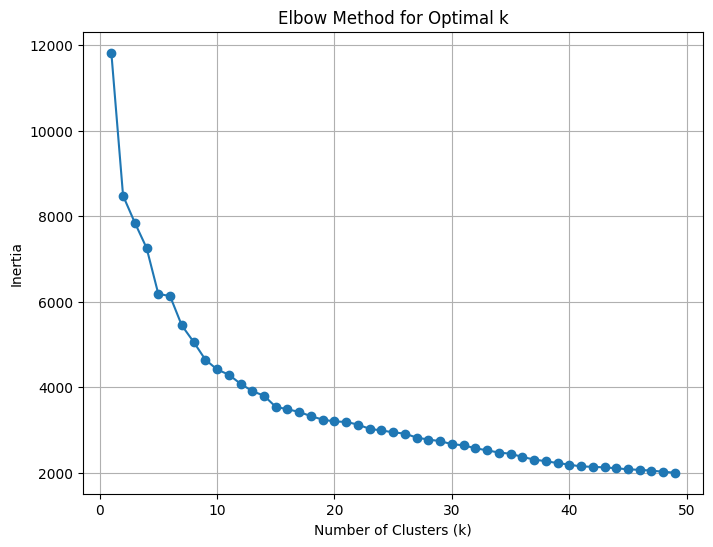

In [51]:
minority_mask = y_train == 1
X_minority = X_train[minority_mask].copy()
y_minority = y_train[minority_mask].copy()

# Scale the minority class data and determine optimal k with Elbow Method
scaler = StandardScaler()
X_minority_scaled = scaler.fit_transform(X_minority)

inertia = []
k_range = range(1, 50)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=24)
    kmeans.fit(X_minority_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)

In [104]:
optimal_k = 10
kmeans = KMeans(n_clusters=optimal_k, random_state=24)
kmeans_labels = kmeans.fit_predict(X_minority_scaled)

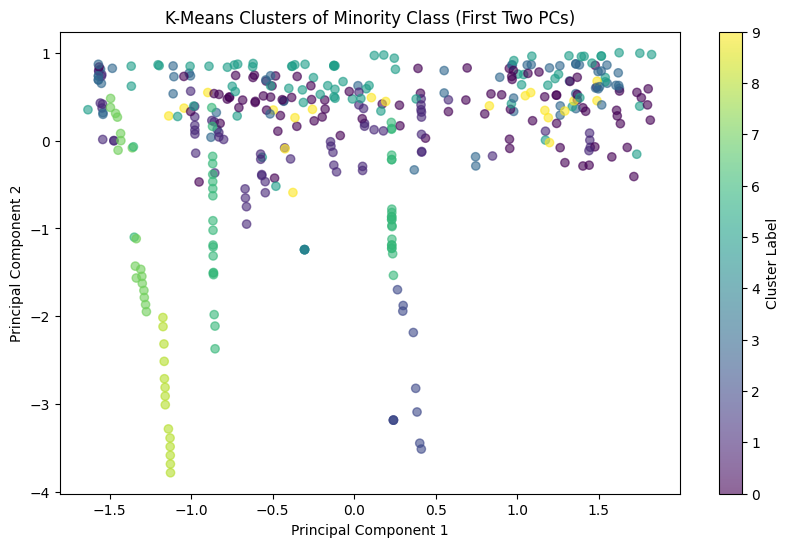

In [105]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_minority_scaled[:, 0], X_minority_scaled[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6)
plt.title('K-Means Clusters of Minority Class (First Two PCs)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster Label')

In [159]:
# Combine minority data with cluster labels and oversample
X_minority_df = pd.DataFrame(X_minority_scaled, columns=[f'feature_{i}' for i in range(X_minority_scaled.shape[1])])
X_minority_df['cluster'] = kmeans_labels
X_minority_df['target'] = y_minority.values

majority_count = (y_train == 0).sum()
target_per_cluster = majority_count // optimal_k
X_resampled_list = []
y_resampled_list = []

for cluster in range(optimal_k):
    cluster_mask = X_minority_df['cluster'] == cluster
    X_cluster = X_minority_df[cluster_mask].drop(['cluster', 'target'], axis=1).values
    y_cluster = X_minority_df[cluster_mask]['target'].values
    if len(X_cluster) > 0:
        # Resample with replacement and add small noise
        if len(X_cluster) < target_per_cluster:
            n_samples = target_per_cluster - len(X_cluster)
            X_synthetic, y_synthetic = resample(X_cluster, y_cluster, replace=True, n_samples=n_samples, random_state=24)
            
            # Add small random noise to avoid exact duplicates
            noise = np.random.normal(0, 0.0001, X_synthetic.shape)
            X_synthetic += noise
            X_cluster_resampled = np.vstack([X_cluster, X_synthetic])
            y_cluster_resampled = np.hstack([y_cluster, y_synthetic])
        
        else:
            X_cluster_resampled = X_cluster
            y_cluster_resampled = y_cluster
        X_resampled_list.append(X_cluster_resampled)
        y_resampled_list.append(y_cluster_resampled)

# Combine resampled minority data with original majority data
X_resampled = np.vstack(X_resampled_list)
y_resampled = np.hstack(y_resampled_list)
X_majority = X_train[y_train == 0].values
X_cbo = np.vstack([X_resampled, X_majority])
y_cbo = np.hstack([y_resampled, y_train[y_train == 0].values])
print("CBO (K-Means) resampled training set class distribution:")
pd.Series(y_cbo, name="CBO (K-Means) resampled data").value_counts()

CBO (K-Means) resampled training set class distribution:


CBO (K-Means) resampled data
0    227451
1    227448
Name: count, dtype: int64

In [91]:
cbo_pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [92]:
cbo_pipeline.fit(X_cbo, y_cbo)

y_pred_cbo = cbo_pipeline.predict(X_test)

/opt/anaconda3/envs/da5401/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Text(0.5, 1.02, 'Confusion Matrix of CBO Model')

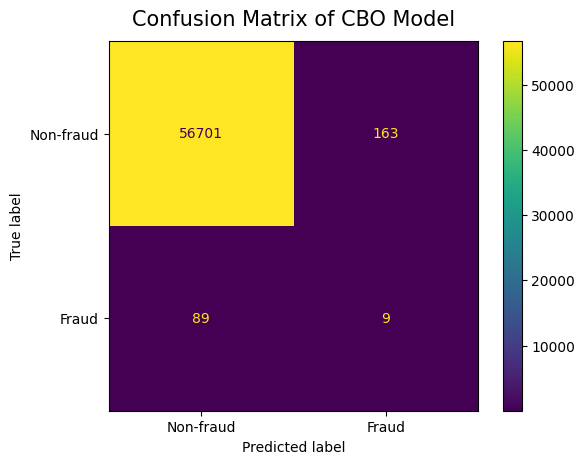

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_cbo, display_labels=["Non-fraud", "Fraud"])
plt.title("Confusion Matrix of CBO (K-Means) Model", fontsize=15, y=1.02)

In [94]:
precision_cbo_model = precision_score(y_test, y_pred_cbo)
recall_cbo_model = recall_score(y_test, y_pred_cbo)
accuracy_cbo_model = accuracy_score(y_test, y_pred_cbo)
f1_cbo_model = f1_score(y_test, y_pred_cbo)

print("The metrics of the CBO model for predicting Fraudulent transactions are: ", end='\n\n')
print("Accuracy : ", accuracy_cbo_model)
print("Precision : ", precision_cbo_model)
print("Recall : ", recall_cbo_model)
print("F1 Score : ", f1_cbo_model)

The metrics of the CBO model for predicting Fraudulent transactions are: 

Accuracy :  0.9955759980337769
Precision :  0.05232558139534884
Recall :  0.09183673469387756
F1 Score :  0.06666666666666667


This shows that the CBO model has made a noticeable shift in performance metrics compared to the baseline and SMOTE models, reflecting the impact of clustering-based oversampling on the minority class. Here are a few specific observations that signify this:

1. **Accuracy** of 0.9956 indicates a high overall correctness, though it’s slightly lower than the baseline, suggesting a trade-off due to the focus on minority class representation.
    - This still reflects the influence of the majority class but is less misleading than the baseline’s near-perfect accuracy.
2. **Precision** shows that out of all the datapoints predicted to be fraud, only ~5% were actually fraud.
    - This low precision indicates a very high rate of false positives, a potential drawback of the clustering-based oversampling approach.
3. **Recall** shows that out of all the fraudulent transactions, only ~9% were correctly predicted as fraud by the model.
    - This is a significant drop from SMOTE’s recall, suggesting the CBO method struggled to capture most fraudulent cases, possibly due to limited synthetic sample diversity or cluster boundaries.
4. **F1 score**, as a balance of precision and recall, indicates poor overall performance for the minority class.
    - It highlights the challenge of optimizing both metrics with this approach, performing worse than both baseline and SMOTE in this context.

This is also clear from the confusion matrix.

### DB Scan based

In [200]:
minority_mask = y_train == 1
X_minority = X_train[minority_mask].copy()
y_minority = y_train[minority_mask].copy()

scaler = StandardScaler()
X_minority_scaled = scaler.fit_transform(X_minority)

# Apply DBSCAN to identify clusters
dbscan = DBSCAN(eps=3.75, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_minority_scaled)

# Identify unique clusters (excluding noise points labeled as -1)
unique_clusters = set(dbscan_labels) - {-1}
optimal_k = len(unique_clusters)
print(f"Number of DBSCAN clusters (excluding noise): {optimal_k}")

Number of DBSCAN clusters (excluding noise): 4


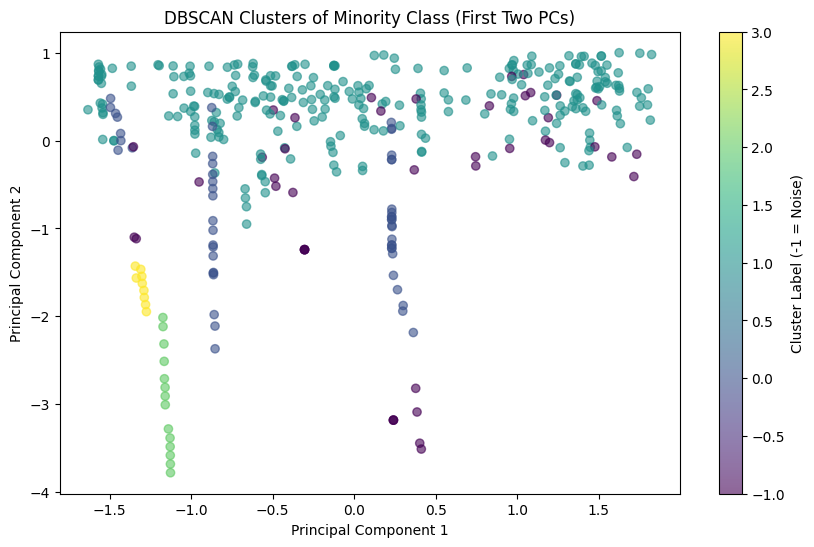

In [201]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_minority_scaled[:, 0], X_minority_scaled[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.6)
plt.title('DBSCAN Clusters of Minority Class (First Two PCs)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster Label (-1 = Noise)')

In [202]:
# Combine minority data with cluster labels
X_minority_df = pd.DataFrame(X_minority_scaled, columns=[f'feature_{i}' for i in range(X_minority_scaled.shape[1])])
X_minority_df['cluster'] = dbscan_labels
X_minority_df['target'] = y_minority.values

# Oversample each cluster to match the majority class size (divided evenly)
majority_count = (y_train == 0).sum()
target_per_cluster = majority_count // optimal_k if optimal_k > 0 else majority_count

X_resampled_list = []
y_resampled_list = []
for cluster in unique_clusters:
    cluster_mask = X_minority_df['cluster'] == cluster
    X_cluster = X_minority_df[cluster_mask].drop(['cluster', 'target'], axis=1).values
    y_cluster = X_minority_df[cluster_mask]['target'].values
    if len(X_cluster) > 0:
        # Resample with replacement and add small noise
        if len(X_cluster) < target_per_cluster:
            n_samples = target_per_cluster - len(X_cluster)
            X_synthetic, y_synthetic = resample(X_cluster, y_cluster, replace=True, n_samples=n_samples, random_state=42)
            # Add small random noise to avoid exact duplicates
            noise = np.random.normal(0, 0.0001, X_synthetic.shape)
            X_synthetic += noise
            X_cluster_resampled = np.vstack([X_cluster, X_synthetic])
            y_cluster_resampled = np.hstack([y_cluster, y_synthetic])
        else:
            X_cluster_resampled = X_cluster
            y_cluster_resampled = y_cluster
        X_resampled_list.append(X_cluster_resampled)
        y_resampled_list.append(y_cluster_resampled)
    else:
        print(f"Skipping cluster {cluster}: empty")

# Combine resampled minority data with original majority data
X_resampled = np.vstack(X_resampled_list)
y_resampled = np.hstack(y_resampled_list)
X_majority = X_train[y_train == 0].values
X_cbo_dbscan = np.vstack([X_resampled, X_majority])
y_cbo_dbscan = np.hstack([y_resampled, y_train[y_train == 0].values])
print("CBO (DBSCAN) resampled training set class distribution:")
pd.Series(y_cbo_dbscan, name="CBO (DBSCAN) resampled data").value_counts()

CBO (DBSCAN) resampled training set class distribution:


CBO (DBSCAN) resampled data
0    227451
1    227448
Name: count, dtype: int64

In [203]:
cbo_dbscan_pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [204]:
cbo_dbscan_pipeline.fit(X_cbo_dbscan, y_cbo_dbscan)

y_pred_cbo_db = cbo_dbscan_pipeline.predict(X_test)

/opt/anaconda3/envs/da5401/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Text(0.5, 1.02, 'Confusion Matrix of CBO (DBSCAN) Model')

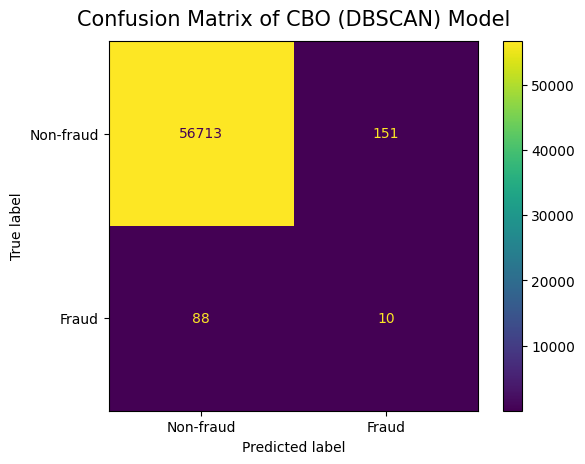

In [205]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_cbo_db, display_labels=["Non-fraud", "Fraud"])
plt.title("Confusion Matrix of CBO (DBSCAN) Model", fontsize=15, y=1.02)

In [206]:
precision_cbo_db_model = precision_score(y_test, y_pred_cbo_db)
recall_cbo_db_model = recall_score(y_test, y_pred_cbo_db)
accuracy_cbo_db_model = accuracy_score(y_test, y_pred_cbo_db)
f1_cbo_db_model = f1_score(y_test, y_pred_cbo_db)

print("The metrics of the CBO (DBSCAN) model for predicting Fraudulent transactions are: ", end='\n\n')
print("Accuracy : ", accuracy_cbo_db_model)
print("Precision : ", precision_cbo_db_model)
print("Recall : ", recall_cbo_db_model)
print("F1 Score : ", f1_cbo_db_model)

The metrics of the CBO (DBSCAN) model for predicting Fraudulent transactions are: 

Accuracy :  0.9958042203574313
Precision :  0.062111801242236024
Recall :  0.10204081632653061
F1 Score :  0.07722007722007722


This shows that the CBO (DBSCAN) model has produced a specific performance profile compared to the baseline, SMOTE, and CBO (K-Means) models, reflecting the impact of density-based clustering and oversampling on the minority class.

1. **Accuracy** of 0.9958 indicates a high overall correctness, slightly better than the baseline and CBO (K-Means), suggesting the model still heavily favors the majority class due to its dominance in the dataset.
    - This high accuracy remains misleading, as it masks the model’s performance on the minority class.
2. **Precision** shows that out of all the datapoints predicted to be fraud, only ~6% were actually fraud.
    - This low precision indicates a still high false positive rate, a common challenge with oversampling methods that may overgeneralize.
3. **Recall** shows that out of all the fraudulent transactions, only ~10% were correctly predicted as fraud by the model.
    - This is an improvement over CBO (K-Means) but still low, suggesting DBSCAN’s density-based clustering may not have captured enough diverse fraudulent patterns for effective detection.
4. **F1 score**, as a balance of precision and recall, indicates poor overall performance for the minority class.
    - It reflects the difficulty in optimizing both metrics, performing marginally better than CBO (K-Means) but worse than SMOTE in this context.

This is also clear from the confusion matrix.

## Clustering-Based Undersampling

# Part C: Model Comparison and Analysis [15 points]
1. Train and Evaluate Models: [5]
    - Model 2 (SMOTE): Train a Logistic Regression classifier on the training data balanced with SMOTE. Evaluate its performance on the same, imbalanced test set from Part A.
    - Model 3 (CBO): Train a Logistic Regression classifier on the training data balanced with your clustering-based oversampling approach. Evaluate its performance on the same, imbalanced test set.
    - Model 4 (CBU): Train a Logistic Regression classifier on the training data balanced with your clustering-based undersampling approach. Evaluate its performance on the same, imbalanced test set.
2. Performance Comparison [5]: Create a summary table or bar chart comparing the Precision, Recall, and F1-score of the four models (Baseline, SMOTE, CBO, and CBU) for the minority class.
3. Conclusion and Recommendations: [5]
    - Discuss the benefits and drawbacks of each resampling method for this problem. Which method performed the best and why?
    - Explain how the clustering-based approaches address the limitations of a naive method like SMOTE.
    - Conclude with a recommendation on which resampling strategy the company should adopt.